# Self-Study: Learning TensorFlow
## Image Prediction Learning with Fashion MNIST
#### 2019 June 27
#### Cameron.Cn | &#26607;&#26234;&#26126;

In [1]:
# importing the libraries we need
from __future__ import absolute_import, division, print_function

# preprocessing functions
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# viewing our plots in the notebook
%matplotlib inline

print(tf.__version__)

1.13.1


In [2]:
print(keras.__version__)

2.2.4-tf


In [3]:
# bringing in the fashion MNIST dataset (sample for training)
fash_mn = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fash_mn.load_data()


|Label |Class|
| --- | --- |
|0 |T-shirt/top|
|1 |Trouser|
|2 |Pullover|
|3 |Dress|
|4 |Coat|
|5 |Sandal|
|6 |Shirt|
|7 	|Sneaker|
|8 |Bag|
|9| Ankle boot|


In [4]:
# setting up our class names (which are already standardized in the set)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
# following along with the tutorial, we are examining the data
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels) # there are 6,000 entries at 28x28 pixel photos (784pixels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


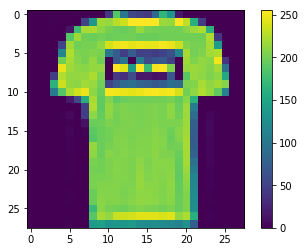

In [9]:
# looking at our first (1st) image--it is a Tshirt
# also note that the 1st image is the 2nd actual entry--after the 0th
plt.figure
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

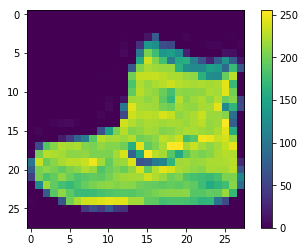

In [10]:
# looking at the FIRST (0th) image, a boot
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

This section, while assuredly important, is not one I really understand.
We are dividing the training images (and test ones) by 255, which it informs me is to stale the values to a range between 0 < X < 1. 

But what is the value being scaled? And why is it important?

In [11]:
# doing some important (?) division...
train_images = train_images / 255.0
test_images = test_images / 255.0

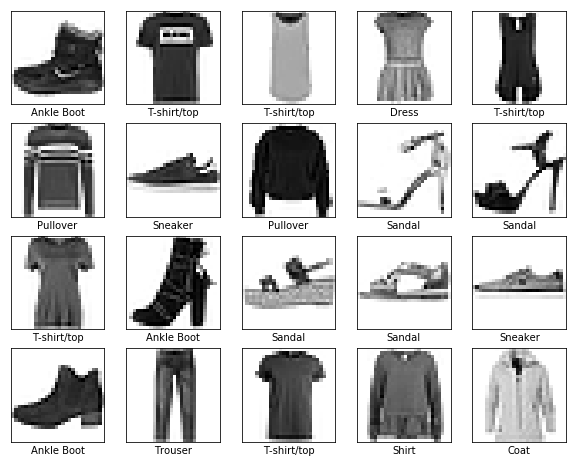

In [12]:
plt.figure(figsize=(10,10))
for i in range(20): # the number of images from the set to display
    plt.subplot(5,5,i+1) # the size of our subplots
    plt.xticks([]) # no marker on the X
    plt.yticks([])# no marker on the Y
    plt.grid(False) # smooth images, otherwise with '#' lines
    plt.imshow(train_images[i], cmap=plt.cm.binary) # training images
    plt.xlabel(class_names[train_labels[i]])# training labels as labels

#### Building the Model ("Neural Net")
1. Configure Layers (Develop Rules)
2. Comipiling Model (Training)

In [13]:
# setting up layers (as according to the guide)
model = keras.Sequential([
    # this lays our pics out into a string of bits (unravels them)
    keras.layers.Flatten(input_shape = (28,28)),
    # 128 nodes ("neurons" in the over-biologicalized fantasy)
    keras.layers.Dense(128, activation = tf.nn.relu),  
    # and this shapes the output into one of the 0-9 digits (our categories)
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
# a warning is normal

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# compiling our model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print('Ran')

Ran


In [17]:
# Training our model!
# this is the exciting initial step
# Epochs are number of iterations to run (and learn from)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 19s 312us/sample - loss: 0.4981 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 17s 283us/sample - loss: 0.3731 - acc: 0.8658 - loss: 0.3738 - acc: 0.8
Epoch 3/5
60000/60000 [==============================] - 17s 286us/sample - loss: 0.3366 - acc: 0.8773 - loss: 
Epoch 4/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.3117 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 18s 301us/sample - loss: 0.2938 - acc: 0.8922


Explainer on Epochs, Iterations, etc | https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9?gi=6644515e3245

---
#### Now the TEST!

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.3583 - acc: 0.8732
Test accuracy:  0.8732


 <center> A little worse than the last two epochs on the training data: 87.32% accurate.That's not a bad score, but I would like to think we could do better than a B+! Maybe a human wouldn't get as high a score... Some of the photos are very grainy and what, exactly, qualifies an ankle boot from a tall sneaker? There are plenty of areas for misshaps, misshapen data,and general "intelligence" errors.
 </center>
 <br>
    <br> 
<b>ML/NN is not magic, and the outputs should be taken as what they rightfuly are: possibilities (probabilities), not prognostications or fortunes.</b>

---

#### Making Predictions

In [34]:
# having the NN create a prediction for every image in the testing set
predictions = model.predict(test_images)

In [35]:
# Here is the prediction for the 0th entry in the set:
predictions[0]

array([1.5647729e-05, 2.3745764e-08, 3.7003394e-06, 1.5009368e-06,
       5.8360678e-07, 1.0870943e-02, 2.5048319e-05, 1.3002439e-01,
       2.6979955e-05, 8.5903120e-01], dtype=float32)

<i> Predictions are arrays of 10 numbers that describe "confidence" (probablities) that the image (data) corresponds to the 10 types of clothing.
    
Here our NN seems to think that the 9th (10th) clothing type is most likely:
    "Ankle Boot" in the dictionary.
</i>

In [36]:
# this asks for the number (0-9) that the NN is "most certain" about matching
# the output
np.argmax(predictions[0])
# 9 is an Ankle Boot

9

In [37]:
np.argmax(predictions[1])
# 2 is a pullover ("hoodie")

2

To me, this looks more like a T-Shirt, let's see how close to a T-shirt the NN got:

In [38]:
predictions[1]

array([7.28384930e-06, 4.23904076e-13, 9.99412775e-01, 4.12451184e-09,
       1.78421324e-04, 1.33462295e-11, 4.01476893e-04, 3.81369450e-11,
       3.63955621e-09, 2.44625804e-12], dtype=float32)

So the NN "thinks" T-Shirt (0) is 72% possible, wheras Hoodie (2) is 99.9% possible...
Interesting

--- 
#### Graphing the Full 10 Channels

In [52]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color('blue')
        
# this massive chunk of code is setting up the graphing conditions
# it is rather more dense than I hazard to interpret at this stage

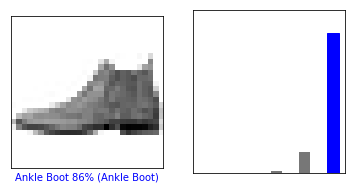

In [53]:
# looking at the 0th entry 
# !!(FROM TEST, NOT FROM TRAIN)!!
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

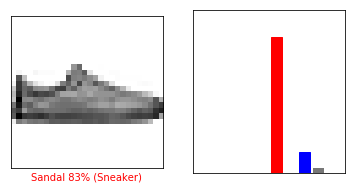

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

#### Exploratory Testing
There are 10.000 entries (anything from 0 to 9999)

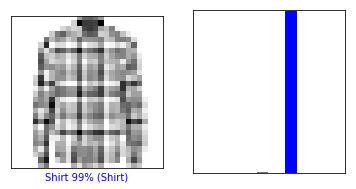

In [57]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

So certain that the shirt is, indeed, a shirt.



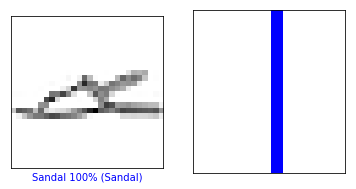

In [59]:
i = 6753
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Sandal is sandal

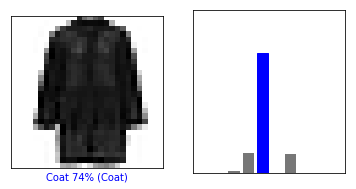

In [62]:
i = 9050
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Looks warm!

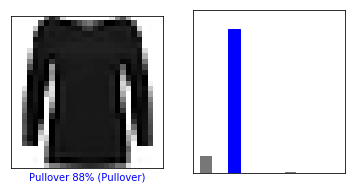

In [63]:
i = 7998
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

I will go with pullover here as well. Fall and early spring are the best, for allowing
pullovers!

---
#### Plotting the First 15 ([0]-[14])

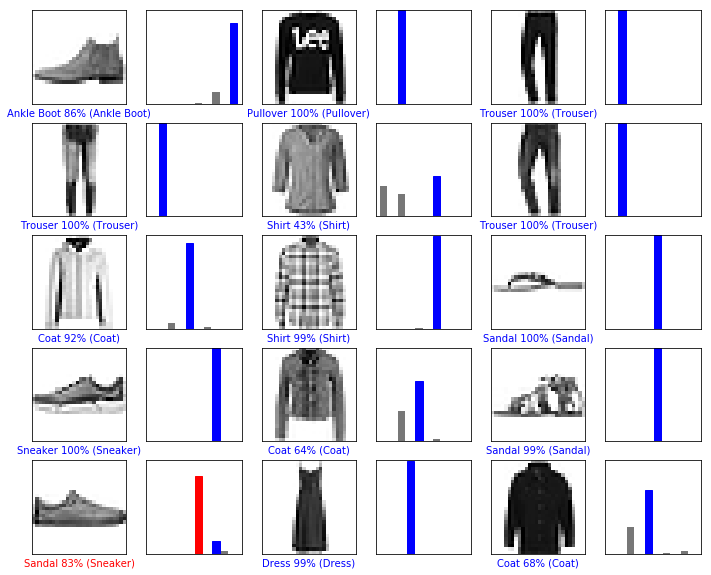

In [64]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)


#### Making predictions about a Single image:

In [67]:
imgT = test_images[4112]
print(imgT.shape)

(28, 28)


In [69]:
# add the image to a batch all by itself--separating it from the herd for analysis
imgT = (np.expand_dims(imgT,0))
print(imgT.shape)

(1, 28, 28)


In [70]:
predictions_single = model.predict(imgT)

print(predictions_single)

[[3.3902109e-04 1.4025370e-05 9.4267058e-01 2.7534986e-04 5.4324575e-02
  9.0773426e-08 1.8391011e-03 2.5774971e-08 5.3718558e-04 2.3323827e-09]]


Looks like we are thinking this article is a: <b>Pullover...(or Coat?)</b>

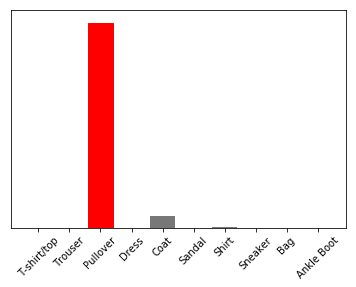

In [71]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [72]:
np.argmax(predictions_single[0])

2

In [74]:
#---
#Project was followed from the TensorFlow website
# https://www.tensorflow.org/tutorials/keras/basic_classification

#---
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
